In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/train.csv')
df

,user_id,item_id,label
0,0,9379,1
1,0,16143,1
2,0,17835,1
3,0,6763,1
4,0,19889,1
...,...,...,...
362114,57528,14621,0
362115,57529,23342,0
362116,57529,731,0
362117,57529,4560,1


In [3]:
def generate_report(df):
    total_interactions = len(df)
    num_users = df["user_id"].nunique()
    num_items = df["item_id"].nunique()
    liked_count = df["label"].sum()
    disliked_count = total_interactions - liked_count

    liked_pct = (liked_count / total_interactions) * 100
    disliked_pct = 100 - liked_pct

    # Derived stats
    avg_per_user = total_interactions / num_users
    avg_per_item = total_interactions / num_items

    print("\n" + "=" * 60)
    print("📊 DATASET SUMMARY".center(60))
    print("=" * 60)
    print(f"{'Total interactions:':30} {total_interactions:>15,}")
    print(f"{'Unique users:':30} {num_users:>15,}")
    print(f"{'Unique items:':30} {num_items:>15,}")
    print(f"{'👍 Likes (overall >= 4):':30} {liked_count:>15,}   ({liked_pct:5.2f}%)")
    print(f"{'👎 Dislikes (overall < 4):':30} {disliked_count:>15,}   ({disliked_pct:5.2f}%)")
    print("-" * 60)
    print(f"{'Avg interactions per user:':30} {avg_per_user:>15.2f}")
    print(f"{'Avg interactions per item:':30} {avg_per_item:>15.2f}")
    print("=" * 60 + "\n")

generate_report(df)


                     📊 DATASET SUMMARY                      
Total interactions:                    362,119
Unique users:                           57,530
Unique items:                           34,950
👍 Likes (overall >= 4):                286,191   (79.03%)
👎 Dislikes (overall < 4):               75,928   (20.97%)
------------------------------------------------------------
Avg interactions per user:                6.29
Avg interactions per item:               10.36



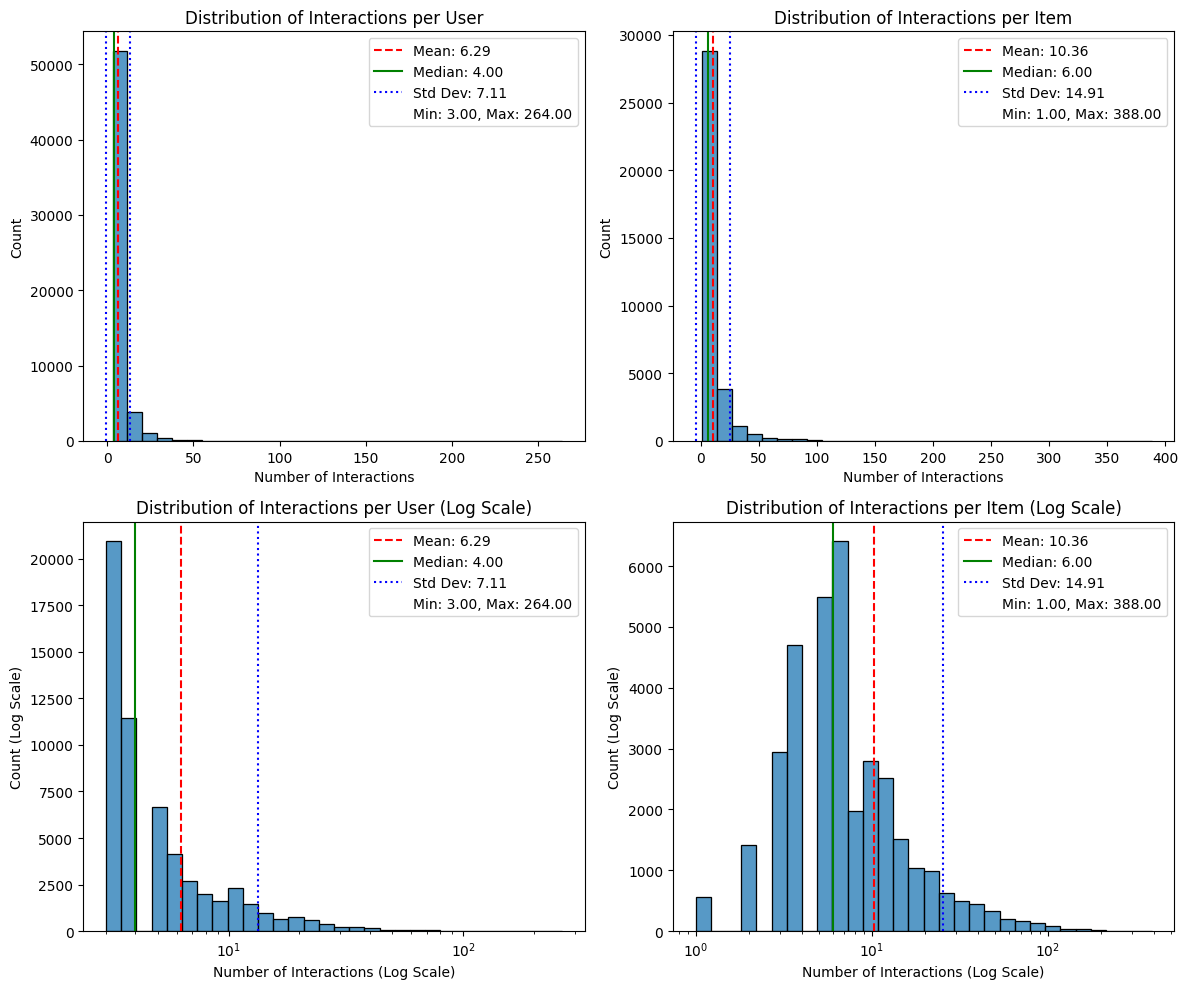

In [4]:
def plot_distribution(df, ax, title):
    mean = df.mean()
    median = df.median()
    std = df.std()
    min_ = df.min()
    max_ = df.max()

    sns.histplot(df, bins=30, ax=ax[0])
    ax[0].set_title(title)
    ax[0].set_xlabel('Number of Interactions')
    ax[0].set_ylabel('Count')
    ax[0].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    ax[0].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    ax[0].axvline(mean + std, color='b', linestyle=':', label=f'Std Dev: {std:.2f}')
    ax[0].axvline(mean - std, color='b', linestyle=':')
    ax[0].plot([], [], ' ', label=f'Min: {min_:.2f}, Max: {max_:.2f}')
    ax[0].legend()

    sns.histplot(df, bins=30, ax=ax[1], log_scale=True)
    ax[1].set_title(title + ' (Log Scale)')
    ax[1].set_xlabel('Number of Interactions (Log Scale)')
    ax[1].set_ylabel('Count (Log Scale)')
    ax[1].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    ax[1].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    ax[1].axvline(mean + std, color='b', linestyle=':', label=f'Std Dev: {std:.2f}')
    ax[1].axvline(mean - std, color='b', linestyle=':')
    ax[1].plot([], [], ' ', label=f'Min: {min_:.2f}, Max: {max_:.2f}')
    ax[1].legend()

user_counts = df.groupby('user_id').size()
item_counts = df.groupby('item_id').size()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_distribution(user_counts, axes[:, 0], 'Distribution of Interactions per User')
plot_distribution(item_counts, axes[:, 1], 'Distribution of Interactions per Item')

plt.tight_layout()
plt.show()